In [30]:
import pandas as pd, numpy as np
weather1 = pd.read_csv("https://assets.datacamp.com/production/repositories/516/datasets/58c1ead59818b2451324e9e84239db7bda6b11d3/pittsburgh2013.csv",
                     index_col = 'Date')

weather1 = weather1.iloc[:,[1]]
weather1.head(3)



,Mean TemperatureF
Date,
2013-1-1,28
2013-1-2,21
2013-1-3,24


In [31]:
# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

# Print the head of weather2
print(weather2.head(2))

           Mean TemperatureF
Date                        
2013-1-1                  28
2013-1-10                 34


In [32]:
# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending=False)

# Print the head of weather3
print(weather3.head())

          Mean TemperatureF
Date                       
2013-9-9                 68
2013-9-8                 71
2013-9-7                 63
2013-9-6                 60
2013-9-5                 65


In [33]:
# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values('Mean TemperatureF')

# Print the head of weather4
print(weather4.head())

           Mean TemperatureF
Date                        
2013-1-22                  9
2013-1-23                 11
2013-2-2                  14
2013-2-1                  16
2013-1-24                 16


In [49]:
weather =   {'Mean TemperatureF' : [61.956044,32.133333,68.934783,43.434783]}

Month = ['Apr','Jan','Jul','Oct']

weather = pd.DataFrame(weather,index=Month)
weather.index.name = "Month"

weather



,Mean TemperatureF
Month,
Apr,61.956044
Jan,32.133333
Jul,68.934783
Oct,43.434783


In [50]:
year = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']

# Reindex weather1 using the list year: weather2
weather2 = weather.reindex(index = year)

# Print weather2
print(weather2)

       Mean TemperatureF
Month                   
Jan            32.133333
Feb                  NaN
Mar                  NaN
Apr            61.956044
May                  NaN
Jun                  NaN
Jul            68.934783
Aug                  NaN
Sep                  NaN
Oct            43.434783
Nov                  NaN
Dec                  NaN


Reorder the rows of weather1 just as you did above, __this time chaining the .ffill() method to replace the null values with the last preceding non-null value.__


__apply the .ffill()__ method to forward-fill the null entries when upsampling.

In [52]:
# Reindex weather1 using the list year with forward-fill: weather3
weather3 = weather.reindex(year).ffill()

# Print weather3
print(weather3)

       Mean TemperatureF
Month                   
Jan            32.133333
Feb            32.133333
Mar            32.133333
Apr            61.956044
May            61.956044
Jun            61.956044
Jul            68.934783
Aug            68.934783
Sep            68.934783
Oct            43.434783
Nov            43.434783
Dec            43.434783


Notice that values corresponding to months __missing from weather1 are filled with NaN values in weather2__. <br>
This does not happen in __weather3, since you used forward-fill.__

## Reindexing using another DataFrame Index
__and take out common months__

In [59]:
weather2 = pd.DataFrame(weather2)
weather2 

,Mean TemperatureF
Month,
Jan,32.133333
Feb,NaN
Mar,NaN
Apr,61.956044
May,NaN
Jun,NaN
Jul,68.934783
Aug,NaN
Sep,NaN


In [60]:
common_month = weather.reindex(weather2.index)
common_month

,Mean TemperatureF
Month,
Jan,32.133333
Feb,NaN
Mar,NaN
Apr,61.956044
May,NaN
Jun,NaN
Jul,68.934783
Aug,NaN
Sep,NaN


In [61]:
common_month.dropna()

,Mean TemperatureF
Month,
Jan,32.133333
Apr,61.956044
Jul,68.934783
Oct,43.434783


# Arithmetic with Series & DataFrames


In [65]:
weather1.head()

,Mean TemperatureF
Date,
2013-1-1,28
2013-1-2,21
2013-1-3,24
2013-1-4,28
2013-1-5,30


### scaler multiplication

In [92]:
weather1.loc['2013-1-1':'2013-1-5',['Mean TemperatureF']] * 2

,Mean TemperatureF
Date,
2013-1-1,56
2013-1-2,42
2013-1-3,48
2013-1-4,56
2013-1-5,60


In [93]:
weather1.loc['2013-1-1':'2013-1-5','Mean TemperatureF'] * 2

Date
2013-1-1    56
2013-1-2    42
2013-1-3    48
2013-1-4    56
2013-1-5    60
Name: Mean TemperatureF, dtype: int64

In [94]:
weather1.iloc[[0,3,5], 0 ]* 2

Date
2013-1-1    56
2013-1-4    56
2013-1-6    68
Name: Mean TemperatureF, dtype: int64

__note->__
- __cant use : with [ ]__
- __[ ] is used with ,__

In [117]:
weather4 = pd.read_csv("https://assets.datacamp.com/production/repositories/516/datasets/58c1ead59818b2451324e9e84239db7bda6b11d3/pittsburgh2013.csv",
                     index_col = 'Date')

week = weather4.loc['2013-7-1': '2013-7-7',['Min TemperatureF','Max TemperatureF']]
week 

,Min TemperatureF,Max TemperatureF
Date,,
2013-7-1,66,79
2013-7-2,66,84
2013-7-3,71,86
2013-7-4,70,86
2013-7-5,69,86
2013-7-6,70,89
2013-7-7,70,77


In [118]:
week_mean = weather4.loc['2013-7-1': '2013-7-7',['Mean TemperatureF']]
week_mean

,Mean TemperatureF
Date,
2013-7-1,72
2013-7-2,74
2013-7-3,78
2013-7-4,77
2013-7-5,76
2013-7-6,78
2013-7-7,72


__Relative temperature range__

In [177]:
week/week_mean

,Max TemperatureF,Mean TemperatureF,Min TemperatureF
Date,,,
2013-7-1,NaN,NaN,NaN
2013-7-2,NaN,NaN,NaN
2013-7-3,NaN,NaN,NaN
2013-7-4,NaN,NaN,NaN
2013-7-5,NaN,NaN,NaN
2013-7-6,NaN,NaN,NaN
2013-7-7,NaN,NaN,NaN


__div function for division__

In [181]:
week[['Min TemperatureF', 'Max TemperatureF']].div(week_mean["Mean TemperatureF"],
                                                      axis='rows')
#########
week.div(week_mean["Mean TemperatureF"],axis='rows')

,Min TemperatureF,Max TemperatureF
Date,,
2013-7-1,0.916667,1.097222
2013-7-2,0.891892,1.135135
2013-7-3,0.910256,1.102564
2013-7-4,0.909091,1.116883
2013-7-5,0.907895,1.131579
2013-7-6,0.897436,1.141026
2013-7-7,0.972222,1.069444


__divide function__

In [175]:
week[['Min TemperatureF', 'Max TemperatureF']].divide(week_mean['Mean TemperatureF'], 
                                                      axis='rows')

#######
week.divide(week_mean['Mean TemperatureF'],axis='rows')

,Min TemperatureF,Max TemperatureF
Date,,
2013-7-1,0.916667,1.097222
2013-7-2,0.891892,1.135135
2013-7-3,0.910256,1.102564
2013-7-4,0.909091,1.116883
2013-7-5,0.907895,1.131579
2013-7-6,0.897436,1.141026
2013-7-7,0.972222,1.069444


__Percentage change__

In [108]:
week_mean.pct_change() * 100

,Mean TemperatureF
Date,
2013-7-1,NaN
2013-7-2,2.777778
2013-7-3,5.405405
2013-7-4,-1.282051
2013-7-5,-1.298701
2013-7-6,2.631579
2013-7-7,-7.692308


In [206]:
medals = pd.read_csv('https://assets.datacamp.com/production/repositories/502/datasets/bf22326ecc9171f68796ad805a7c1135288120b6/all_medalists.csv')

print(medals['NOC'].values)

ML=medals[medals['NOC'].isin(['USA','AUT','ARM', 'CUB', 'RUS'])]
ML.head(3)

['HUN' 'AUT' 'GRE' ... 'ARM' 'CUB' 'RUS']


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze


In [253]:
Gold = ML[ML.Medal == 'Gold']
Bronze = ML[ML.Medal == 'Bronze']
Silver =  ML[ML.Medal == 'Silver']

In [252]:
Gold = Gold.groupby(["NOC"])["Medal"].count()
Gold = pd.DataFrame(Gold)
Gold.columns = ["Gold"]
Gold

,Gold
NOC,
ARM,1
AUT,21
CUB,160
RUS,192
USA,2088


# Adding unaligned DataFrames

In [273]:
january=pd.DataFrame({'Units':[19,17,20,10,13]},
           index = ['Acme Corporation ','Hooli','Initech','Mediacore','Streeplex'])
january.index.name = "Company"
january

,Units
Company,
Acme Corporation,19
Hooli,17
Initech,20
Mediacore,10
Streeplex,13


In [274]:
february = pd.DataFrame({'Units':[15,3,13,25]},
            index = ['Acme Corporation ','Hooli','Mediacore','Vandelay Inc'])
                  
february.index.name = "Company"
february

,Units
Company,
Acme Corporation,15
Hooli,3
Mediacore,13
Vandelay Inc,25


In [275]:
january + february

,Units
Company,
Acme Corporation,34.0
Hooli,20.0
Initech,NaN
Mediacore,23.0
Streeplex,NaN
Vandelay Inc,NaN


In [276]:
january.add(february)

,Units
Company,
Acme Corporation,34.0
Hooli,20.0
Initech,NaN
Mediacore,23.0
Streeplex,NaN
Vandelay Inc,NaN


In [288]:
import pandas as pd, numpy as np
weather = pd.read_csv("https://assets.datacamp.com/production/repositories/516/datasets/58c1ead59818b2451324e9e84239db7bda6b11d3/pittsburgh2013.csv",
                     parse_dates=True,
                      index_col = 'Date')
weather = weather.iloc[0:5,]
weather.head()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,32,28,21,30,27,16,100,89,77,30.10,...,10,6,2,10,8,NaN,0.00,8,Snow,277
2013-01-02,25,21,17,14,12,10,77,67,55,30.27,...,10,10,10,14,5,NaN,0.00,4,NaN,272
2013-01-03,32,24,16,19,15,9,77,67,56,30.25,...,10,10,10,17,8,26.0,0.00,3,NaN,229
2013-01-04,30,28,27,21,19,17,75,68,59,30.28,...,10,10,6,23,16,32.0,0.00,4,NaN,250
2013-01-05,34,30,25,23,20,16,75,68,61,30.42,...,10,10,10,16,10,23.0,0.21,5,NaN,221


## Arithmetic

subset a collection of columns related to temperature measurements in degrees Fahrenheit, convert them to degrees Celsius, and relabel the columns of the new DataFrame to reflect the change of units.

Remember, ordinary __arithmetic operators (like +, -, *, and /) broadcast scalar values to conforming DataFrames when combining scalars & DataFrames in arithmetic expressions.__ Broadcasting also works with pandas Series and NumPy arrays.

__Note:__<br>
- scalar value refers to a single value<br>
- scalar value is in contrast to a set of values

In [279]:
# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[['Min TemperatureF','Mean TemperatureF', 'Max TemperatureF']]

# Convert temps_f to celsius: temps_c
temps_c =  (temps_f - 32) * 5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F', 'C')

# Print first 5 rows of temps_c
print(temps_c.head())

          Min TemperatureC  Mean TemperatureC  Max TemperatureC
Date                                                           
2013-1-1         -6.111111          -2.222222          0.000000
2013-1-2         -8.333333          -6.111111         -3.888889
2013-1-3         -8.888889          -4.444444          0.000000
2013-1-4         -2.777778          -2.222222         -1.111111
2013-1-5         -3.888889          -1.111111          1.111111


In [302]:
weather['2013-01-03':]

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-03,32,24,16,19,15,9,77,67,56,30.25,...,10,10,10,17,8,26.0,0.00,3,NaN,229
2013-01-04,30,28,27,21,19,17,75,68,59,30.28,...,10,10,6,23,16,32.0,0.00,4,NaN,250
2013-01-05,34,30,25,23,20,16,75,68,61,30.42,...,10,10,10,16,10,23.0,0.21,5,NaN,221


In [292]:
weather.resample('A').last()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,34,30,25,23,20,16,75,68,61,30.42,...,10,10,10,16,10,23.0,0.21,5,Snow,221


## Computing percentage growth of GDP

In [304]:
import pandas as pd

# Read 'GDP.csv' into a DataFrame: gdp
gdp = pd.read_csv('GDP.csv',parse_dates=True, index_col='DATE')

# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp['2008':]

# Print the last 8 rows of post2008
print(post2008.tail(8))

                  GDP
DATE                 
2018-01-01  20163.159
2018-04-01  20510.177
2018-07-01  20749.752
2018-10-01  20897.804
2019-01-01  21098.827
2019-04-01  21340.267
2019-07-01  21542.540
2019-10-01  21729.124


In [305]:
# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last() 

# Print yearly
print(yearly)

                  GDP
DATE                 
2008-12-31  14559.543
2009-12-31  14628.021
2010-12-31  15240.843
2011-12-31  15796.460
2012-12-31  16358.863
2013-12-31  17083.137
2014-12-31  17849.912
2015-12-31  18350.825
2016-12-31  18991.883
2017-12-31  19918.910
2018-12-31  20897.804
2019-12-31  21729.124


In [306]:
# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] =  yearly.pct_change() * 100

# Print yearly again
print(yearly)

                  GDP    growth
DATE                           
2008-12-31  14559.543       NaN
2009-12-31  14628.021  0.470331
2010-12-31  15240.843  4.189371
2011-12-31  15796.460  3.645579
2012-12-31  16358.863  3.560310
2013-12-31  17083.137  4.427410
2014-12-31  17849.912  4.488491
2015-12-31  18350.825  2.806249
2016-12-31  18991.883  3.493347
2017-12-31  19918.910  4.881175
2018-12-31  20897.804  4.914395
2019-12-31  21729.124  3.978026


## Converting currency of stocks

In [307]:
# Import pandas
import pandas as pd

# Read 'sp500.csv' into a DataFrame: sp500
sp500 = pd.read_csv('https://assets.datacamp.com/production/repositories/516/datasets/7a9b570a02ef589891d9576a86876a616ca5f3c8/sp500.csv',
                     parse_dates=True , index_col='Date')

In [308]:
# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open','Close']]

# Print the head of dollars
print(dollars.head())

                   Open        Close
Date                                
2015-01-02  2058.899902  2058.199951
2015-01-05  2054.439941  2020.579956
2015-01-06  2022.150024  2002.609985
2015-01-07  2005.550049  2025.900024
2015-01-08  2030.609985  2062.139893


In [316]:
# Read 'exchange.csv' into a DataFrame: exchange
exchange = pd.read_csv('https://assets.datacamp.com/production/repositories/516/datasets/e91482db6a7bae394653278e4e908e63ed9ac833/exchange.csv',
                        parse_dates=True , index_col='Date')

# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange['GBP/USD'] ,axis='rows')

# Print the head of pounds
print(pounds.head())

                   Open        Close
Date                                
2015-01-02  1340.364425  1339.908750
2015-01-05  1348.616555  1326.389506
2015-01-06  1332.515980  1319.639876
2015-01-07  1330.562125  1344.063112
2015-01-08  1343.268811  1364.126161


In [317]:
exchange.head()

,GBP/USD
Date,
2015-01-02,0.65101
2015-01-05,0.65644
2015-01-06,0.65896
2015-01-07,0.66344
2015-01-08,0.66151


# Concatenating data


In [319]:
w = pd.read_csv("https://assets.datacamp.com/production/repositories/516/datasets/58c1ead59818b2451324e9e84239db7bda6b11d3/pittsburgh2013.csv",
                     parse_dates=True)
w.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2013-1-1,32,28,21,30,27,16,100,89,77,...,10,6,2,10,8,NaN,0.00,8,Snow,277
1,2013-1-2,25,21,17,14,12,10,77,67,55,...,10,10,10,14,5,NaN,0.00,4,NaN,272
2,2013-1-3,32,24,16,19,15,9,77,67,56,...,10,10,10,17,8,26.0,0.00,3,NaN,229
3,2013-1-4,30,28,27,21,19,17,75,68,59,...,10,10,6,23,16,32.0,0.00,4,NaN,250
4,2013-1-5,34,30,25,23,20,16,75,68,61,...,10,10,10,16,10,23.0,0.21,5,NaN,221


In [322]:
# change the invoice_date format - String to Timestamp format
w['t_date'] = pd.to_datetime(w.Date, format='%Y/%m/%d')
w.head()


,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,t_date
0,2013-1-1,32,28,21,30,27,16,100,89,77,...,6,2,10,8,NaN,0.00,8,Snow,277,2013-01-01
1,2013-1-2,25,21,17,14,12,10,77,67,55,...,10,10,14,5,NaN,0.00,4,NaN,272,2013-01-02
2,2013-1-3,32,24,16,19,15,9,77,67,56,...,10,10,17,8,26.0,0.00,3,NaN,229,2013-01-03
3,2013-1-4,30,28,27,21,19,17,75,68,59,...,10,6,23,16,32.0,0.00,4,NaN,250,2013-01-04
4,2013-1-5,34,30,25,23,20,16,75,68,61,...,10,10,16,10,23.0,0.21,5,NaN,221,2013-01-05


In [323]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-insert/
# DataFrameName.insert(loc, column, value, allow_duplicates = False)

w.insert(loc=2, column='year_month', value=w['t_date'].map(lambda x: 100*x.year + x.month))
w.insert(loc=3, column='month', value=w.t_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
w.insert(loc=4, column='day', value=(w.t_date.dt.dayofweek)+1)
w.insert(loc=5, column='hour', value=w.t_date.dt.hour)



In [327]:
w.head()

,Date,Max TemperatureF,year_month,month,day,hour,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,t_date
0,2013-1-1,32,201301,1,2,0,28,21,30,27,...,6,2,10,8,NaN,0.00,8,Snow,277,2013-01-01
1,2013-1-2,25,201301,1,3,0,21,17,14,12,...,10,10,14,5,NaN,0.00,4,NaN,272,2013-01-02
2,2013-1-3,32,201301,1,4,0,24,16,19,15,...,10,10,17,8,26.0,0.00,3,NaN,229,2013-01-03
3,2013-1-4,30,201301,1,5,0,28,27,21,19,...,10,6,23,16,32.0,0.00,4,NaN,250,2013-01-04
4,2013-1-5,34,201301,1,6,0,30,25,23,20,...,10,10,16,10,23.0,0.21,5,NaN,221,2013-01-05


In [348]:
weather[~weather['Max TemperatureF']]

KeyError: "None of [Int64Index([-33, -26, -33, -31, -35], dtype='int64')] are in the [columns]"

In [343]:
weather

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,32,28,21,30,27,16,100,89,77,30.10,...,10,6,2,10,8,NaN,0.00,8,Snow,277
2013-01-02,25,21,17,14,12,10,77,67,55,30.27,...,10,10,10,14,5,NaN,0.00,4,NaN,272
2013-01-03,32,24,16,19,15,9,77,67,56,30.25,...,10,10,10,17,8,26.0,0.00,3,NaN,229
2013-01-04,30,28,27,21,19,17,75,68,59,30.28,...,10,10,6,23,16,32.0,0.00,4,NaN,250
2013-01-05,34,30,25,23,20,16,75,68,61,30.42,...,10,10,10,16,10,23.0,0.21,5,NaN,221


In [437]:
t = []
for i in [weather]:
    t.append(i['Max TemperatureF'])

t

[Date
 2013-01-01    32
 2013-01-02    25
 2013-01-03    32
 2013-01-04    30
 2013-01-05    34
 Name: Max TemperatureF, dtype: int64]

In [414]:
m = []
for i in weather['Max TemperatureF']:
    m.append(i)
m

[32, 25, 32, 30, 34]

In [412]:
j = [weather]
type(j)

list

# pd.concat

In [455]:
rain2013 = pd.DataFrame({'Precipitation':[.09, 0.06, 0.07, 0.03]}
                        ,index = ['jan','feb','mar','april'])
rain2013.index.name = "Month"
rain2013

,Precipitation
Month,
jan,0.09
feb,0.06
mar,0.07
april,0.03


In [471]:

rain2014 =  pd.DataFrame({'Precipitation':[.08, 0.09, 0.05, 0.03]}
                        ,index = ['jan','feb','mar','april'])
rain2014.index.name = "Month"
rain2014


,Precipitation
Month,
jan,0.08
feb,0.09
mar,0.05
april,0.03


In [458]:
pd.concat([rain2013,rain2014], axis = 0)

,Precipitation
Month,
jan,0.09
feb,0.06
mar,0.07
april,0.03
jan,0.08
feb,0.09
mar,0.05
april,0.03


## multi index on rows

In [477]:
rain = pd.concat([rain2013,rain2014],keys = [2013,2014], axis = 0)
rain

Precipitation
     Month               
2013 jan             0.09
     feb             0.06
     mar             0.07
     april           0.03
2014 jan             0.08
     feb             0.09
     mar             0.05
     april           0.03

## accessing multi indexing

In [486]:
pd.concat([rain.loc[2014]])

,Precipitation
Month,
jan,0.08
feb,0.09
mar,0.05
april,0.03


In [464]:
rain_col = pd.concat([rain2013,rain2014],keys = [2013,2014], axis = 1)
rain_col

,2013,2014
,Precipitation,Precipitation
Month,,
jan,0.09,0.08
feb,0.06,0.09
mar,0.07,0.05
april,0.03,0.03


## pd.concat with dictionary

In [466]:
rain_dict = {2013: rain2013, 2014: rain2014}
rain1314 = pd.concat(rain_dict, axis = 1)
rain1314

,2013,2014
,Precipitation,Precipitation
Month,,
jan,0.09,0.08
feb,0.06,0.09
mar,0.07,0.05
april,0.03,0.03


In [ ]:
for medal in medal_types:

    file_name = "%s_top5.csv" % medal
    
    # Read file_name into a DataFrame: medal_df
    medal_df =  pd.read_csv('gold_top5.csv', header=0, index_col         
                             ='Country')
    
    # Append medal_df to medals
    medals.append(medal_df)
    
# Concatenate medals: medals
medals = pd.concat(medals,keys=['bronze', 'silver', 'gold'],axis=1)

# Print medals in entirety
print(medals)

In [ ]:
for medal in medal_types:

    file_name = "%s_top5.csv" % medal

    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, index_col='Country')
    
    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals: medals
medals = pd.concat(medals, keys=['bronze', 'silver', 'gold'])

# Print medals
print(medals)

In [497]:
rain.loc[:,'Precipitation']

      Month
2013  jan      0.09
      feb      0.06
      mar      0.07
      april    0.03
2014  jan      0.08
      feb      0.09
      mar      0.05
      april    0.03
Name: Precipitation, dtype: float64

In [511]:
rain.loc[2014,'jan']

Precipitation    0.08
Name: (2014, jan), dtype: float64

In [513]:
rain.loc[2014,'Precipitation']

Month
jan      0.08
feb      0.09
mar      0.05
april    0.03
Name: Precipitation, dtype: float64

In [515]:
# pd.IndexSlice[: , 'feb'] says
# select all column of index 1 i.e 2013 and 2014 condition 2 says select only month feb

rain.loc[pd.IndexSlice[:,'feb'],:]

,,Precipitation
,Month,
2013,feb,0.06
2014,feb,0.09


# Multi/Hierarchical indexing, Data Analysis book pg 147

In [552]:
data = pd.Series(np.random.randn(10),
       index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
              [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
data

a  1    0.626001
   2    0.879240
   3    0.817288
b  1    0.130535
   2    0.244356
   3   -0.159645
c  1    2.159223
   2    1.529280
d  2   -0.160223
   3   -1.362643
dtype: float64

In [567]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [553]:
data['a']

1    0.626001
2    0.879240
3    0.817288
dtype: float64

In [568]:
data['a':'c']

a  1    0.626001
   2    0.879240
   3    0.817288
b  1    0.130535
   2    0.244356
   3   -0.159645
c  1    2.159223
   2    1.529280
dtype: float64

In [569]:
data[:,2]

a    0.879240
b    0.244356
c    1.529280
d   -0.160223
dtype: float64

In [570]:
data.unstack()

,1,2,3
a,0.626001,0.879240,0.817288
b,0.130535,0.244356,-0.159645
c,2.159223,1.529280,NaN
d,NaN,-0.160223,-1.362643


In [634]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
                  columns=[['Ohio', 'Ohio', 'Colorado'],
                         ['Green', 'Red', 'Green']])
                 
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [632]:
#index = pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], 
#                                        ['Green', 'Red', 'Green']], 
#                                        names=['state', 'color'])

In [635]:
frame.index

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [636]:
frame.index.names = ['Key_1',"Key_2"]
frame

Ohio     Colorado
            Green Red    Green
Key_1 Key_2                   
a     1         0   1        2
      2         3   4        5
b     1         6   7        8
      2         9  10       11

In [637]:
frame.columns.names = ["State","Color"]
frame

State        Ohio     Colorado
Color       Green Red    Green
Key_1 Key_2                   
a     1         0   1        2
      2         3   4        5
b     1         6   7        8
      2         9  10       11

In [638]:
frame.loc['a',"Ohio"]

Color,Green,Red
Key_2,,
1,0,1
2,3,4


## pd.IndexSlice for inner level indexing

In [595]:
frame.loc[pd.IndexSlice["a",1],"Ohio"]

Color
Green    0
Red      1
Name: (a, 1), dtype: int64

In [597]:
frame.loc[pd.IndexSlice["a",1], pd.IndexSlice["Ohio","Red"]]

1

## data sciencebook pg. 128

In [642]:
index = [('California', 2000), ('California', 2010),
                    ('New York', 2000), ('New York', 2010),
                    ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

pop = pd.Series(populations, index=index) 
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [623]:
pop.index[2]

('New York', 2000)

In [624]:
pop.values[2]

18976457

In [625]:
pop[2]

18976457

### select all values from 2010,

In [601]:
[i for i in pop.index if i[1] == 2010]

[('California', 2010), ('New York', 2010), ('Texas', 2010)]

In [602]:
 pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [616]:
for i in pop.index:
    if i[1] == 2010:
        print(i,pop[i])

('California', 2010) 37253956
('New York', 2010) 19378102
('Texas', 2010) 25145561


## The better way: Pandas MultiIndex

In [692]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [644]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## access all data for which the second index is 2010,

In [647]:
pop[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [659]:
pop['California']

2000    33871648
2010    37253956
dtype: int64

In [663]:
pop['California',2010]

37253956

## unstack and stack

unstack() method will quickly __convert a multiply- indexed Series into a conventionally indexed DataFrame__

In [665]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [666]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [690]:
pop_df = pd.DataFrame({'total': pop,
'under18': [9267089, 9284094,
            4687374, 4318033,
            5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [675]:
pop_df.loc['California','total']

2000    33871648
2010    37253956
Name: total, dtype: int64

In [676]:
pop_df.loc[pd.IndexSlice["California",2000],'total']

33871648

In [679]:
f_u18 = pop_df['under18'] / pop_df['total'] 
f_u18

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

In [682]:
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Methods of MultiIndex Creation

In [693]:
index = [('California', 2000), ('California', 2010),
                    ('New York', 2000), ('New York', 2010),
                    ('Texas', 2000), ('Texas', 2010)]

index = pd.MultiIndex.from_tuples(index)

i = pd.DataFrame({'under18': [9267089, 9284094,
                  4687374, 4318033,
                   5906301, 6879014]},
                   index = index)
i

under18
California 2000  9267089
           2010  9284094
New York   2000  4687374
           2010  4318033
Texas      2000  5906301
           2010  6879014

### most straightforward way to construct a multiply indexed Series or DataFrame is to simply pass a list of two or more index arrays to the constructor.

In [694]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'],
                         [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df


data1     data2
a 1  0.803571  0.096251
  2  0.556740  0.724384
b 1  0.447674  0.035299
  2  0.345608  0.794106

if you __pass a dictionary with appropriate tuples as keys, Pandas will auto‐
matically recognize this and use a MultiIndex by default:__

In [731]:
data = {('California', 2000): 33871648,
                    ('California', 2010): 37253956,
                    ('Texas', 2000): 20851820,
                    ('Texas', 2010): 25145561,
                    ('New York', 2000): 18976457,
                    ('New York', 2010): 19378102}
type(data)

dict

In [734]:
data = pd.Series(data)
data

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

__naming the multi index__

In [735]:
data.index.names = ['state', 'year']
data

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

## MultiIndex for columns

In [740]:
data = np.round(np.random.randn(4, 6), 1) 
#data[:, ::2] *= 10
#data += 37

In [741]:
data

array([[-0.1, -0.7,  0.6,  0.5,  0.8,  0.6],
       [ 0.7,  1.3,  1.1, -0.2,  0.3, -0.7],
       [ 0.4,  0.9,  0.7,  0.7,  0.1, -0.4],
       [ 2.7,  0.3,  0.4, -1.1, -0.9,  0.2]])

In [742]:
data[:, ::2] *= 10  # multiply 10 all rows and columns skiping one column
data

array([[-1. , -0.7,  6. ,  0.5,  8. ,  0.6],
       [ 7. ,  1.3, 11. , -0.2,  3. , -0.7],
       [ 4. ,  0.9,  7. ,  0.7,  1. , -0.4],
       [27. ,  0.3,  4. , -1.1, -9. ,  0.2]])

In [743]:
data += 37  # add 37 to whole dataset
data 

array([[36. , 36.3, 43. , 37.5, 45. , 37.6],
       [44. , 38.3, 48. , 36.8, 40. , 36.3],
       [41. , 37.9, 44. , 37.7, 38. , 36.6],
       [64. , 37.3, 41. , 35.9, 28. , 37.2]])

In [744]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                    names=['year', 'visit'])

columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                       names=['subject', 'type'])

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      36.0  36.3  43.0  37.5  45.0  37.6
     2      44.0  38.3  48.0  36.8  40.0  36.3
2014 1      41.0  37.9  44.0  37.7  38.0  36.6
     2      64.0  37.3  41.0  35.9  28.0  37.2

__index the top-level column by the person’s name and get a full Data Frame containing just that person’s information:__

In [745]:
health_data['Bob']

type          HR  Temp
year visit            
2013 1      36.0  36.3
     2      44.0  38.3
2014 1      41.0  37.9
     2      64.0  37.3

In [756]:
health_data['Guido', 'HR']

year  visit
2013  1        43.0
      2        48.0
2014  1        44.0
      2        41.0
Name: (Guido, HR), dtype: float64

__with the single-index case, we can use the loc, iloc, and ix indexers introduced__

In [757]:
health_data.iloc[:2, :2] # 2 row 2 column

subject      Bob      
type          HR  Temp
year visit            
2013 1      36.0  36.3
     2      44.0  38.3

__each individual index in loc or iloc can be passed a tuple of multiple indices.__

In [760]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        36.0
      2        44.0
2014  1        41.0
      2        64.0
Name: (Bob, HR), dtype: float64

In [763]:
idx = pd.IndexSlice 

health_data.loc[idx[:, 2], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,2,44.0,48.0,40.0
2014,2,64.0,41.0,28.0


## Indexing and Slicing a MultiIndex

__access single elements by indexing with multiple terms:__

In [746]:
pop 

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

__selecting the levels__

In [747]:
pop['California', 2000]

33871648

In [748]:
pop['California']

2000    33871648
2010    37253956
dtype: int64

__Partial slicing with loc function, only if MultiIndex is sorted__

In [749]:
# loc

pop.loc['California':'New York']

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

- __With sorted indices, we can perform partial indexing on lower levels__
- __passing an empty slice in the first index:__

In [750]:
# passing an empty slice in the first index
pop[:, 2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

__Other types of indexing and selection  based on Boolean masks__

In [751]:
pop[pop > 22000000]

California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [752]:
pop[['California', 'Texas']]

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [764]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## Combining Datasets: Concat and Append

In [1]:
import pandas as pd, numpy as np

In [2]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [3]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [117]:
cols = 'ABC'
ind = range(3)

dic = {}

for c in cols:
    value=[]
    for i in ind:
        value.append(str(c) + str(i))
    dic[c] = value
print(dic) 

{'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2'], 'C': ['C0', 'C1', 'C2']}


__concat array, with np.concatenate, default row__

In [121]:
x=[1,2,3]; y=[4,5,6] ; z=[7,8,9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [123]:
x = [[1, 2],
    [3, 4]]
np.concatenate([x, x], axis=1) #column wise

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

- __pd.concat(), default rows__
- similar syntax to np.concatenate but contains a number of options 

In [124]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3]) 

ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])

pd.concat([ser1, ser2])


1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [141]:
df1 = make_df('AB', [1, 2]) 
df2 = make_df('AB', [3, 4])

print(df1,"\n"); print(df2);


    A   B
1  A1  B1
2  A2  B2 

    A   B
3  A3  B3
4  A4  B4


In [140]:
print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


__concat at column level ie axis = 1__

In [156]:
df3 = make_df('AB', [0, 1]) 
df4 = make_df('CD', [0, 1])

print(df3,"\n"); print(df4)

    A   B
0  A0  B0
1  A1  B1 

    C   D
0  C0  D0
1  C1  D1


In [158]:
print(pd.concat([df3, df4], axis = 1))

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


__Duplicate indices__
- pd.concat preserves indices, even if the result will have     
  duplicate indices

In [4]:
x = make_df('AB', [0, 1]) 
y = make_df('AB', [2, 3])

In [5]:
y.index = x.index # make duplicate indices! 

print(x,'\n'); print(y,'\n'); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1 

    A   B
0  A2  B2
1  A3  B3 

    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


 __Ignoring the index__
 - With this set to True, the concatenation will create a new integer index for the resulting Series:

In [163]:
print(x,'\n'); print(y,'\n'); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1 

    A   B
0  A2  B2
1  A3  B3 

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


__Adding MultiIndex keys.__

In [164]:
print(x,'\n'); print(y,'\n'); print(pd.concat([x, y], keys=['x', 'y']))


    A   B
0  A0  B0
1  A1  B1 

    A   B
0  A2  B2
1  A3  B3 

      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [39]:
m = pd.concat([x, y])
m = pd.DataFrame(m)
m

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [41]:
m['C'] = [np.nan,np.nan,np.nan,np.nan]
m

,A,B,C
0,A0,B0,NaN
1,A1,B1,NaN
0,A2,B2,NaN
1,A3,B3,NaN


# nan value

In [47]:
data = {'Name': ['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Height': [5.1, 6.2, 5.1, 5.2], 
        'Qualification': ['Msc', 'MA', 'Msc', 'Msc']} 
  
# Convert the dictionary into DataFrame 
df = pd.DataFrame(data) 
  
# Declare a list that is to be converted into a column 
address = [np.nan, 'Bangalore', np.nan, 'Patna'] 


# Using 'Address' as the column name 
# and equating it to the list 
df['Address'] = address 
  
# Observe the result 
df 

,Name,Height,Qualification,Address
0,Jai,5.1,Msc,NaN
1,Princi,6.2,MA,Bangalore
2,Gaurav,5.1,Msc,NaN
3,Anuj,5.2,Msc,Patna


In [48]:
df.isnull().any()

Name             False
Height           False
Qualification    False
Address           True
dtype: bool

## loc function to filter values of column A having NA values in column B

__filter Name having na values in Address__

In [50]:
df.loc[df['Address'].isnull(), 'Name'].unique()

array(['Jai', 'Gaurav'], dtype=object)

In [53]:
df.loc[df['Address'].isnull()]

,Name,Height,Qualification,Address
0,Jai,5.1,Msc,NaN
2,Gaurav,5.1,Msc,NaN


In [61]:
df[df['Address'].isnull()]

,Name,Height,Qualification,Address
0,Jai,5.1,Msc,NaN
2,Gaurav,5.1,Msc,NaN


In [72]:
df.loc[df['Name']=='Jai',"Address"]= "anna_nagar"
df

,Name,Height,Qualification,Address
0,Jai,5.1,Msc,anna_nagar
1,Princi,6.2,MA,Bangalore
2,Gaurav,5.1,Msc,NaN
3,Anuj,5.2,Msc,Patna


In [73]:
df['Name'][df['Address'].isnull()].unique()

array(['Gaurav'], dtype=object)

In [74]:
[df['Address'].isnull()]

[0    False
 1    False
 2     True
 3    False
 Name: Address, dtype: bool]

In [81]:
df.query("Height == 5.1 & Qualification == 'Msc' ")

,Name,Height,Qualification,Address
0,Jai,5.1,Msc,anna_nagar
2,Gaurav,5.1,Msc,NaN


In [84]:
import seaborn as sns
planets = sns.load_dataset('planets') 
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [100]:
for (method, group) in planets.groupby('method'): 
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [91]:
planets.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [111]:
for (method, group) in planets.groupby('method'): 
    print("{0:30s} median={1}".format(method, group['orbital_period'].median()))

Astrometry                     median=631.1800000000001
Eclipse Timing Variations      median=4343.5
Imaging                        median=27500.0
Microlensing                   median=3300.0
Orbital Brightness Modulation  median=0.342887
Pulsar Timing                  median=66.5419
Pulsation Timing Variations    median=1170.0
Radial Velocity                median=360.2
Transit                        median=5.714932
Transit Timing Variations      median=57.011


# Aggregate, filter, transform, apply

In [182]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)}, columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [118]:
df.groupby('key').aggregate([min, np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [127]:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [156]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

In [183]:
print(df.groupby('key').apply(norm_by_data2))

  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [179]:
1/27

0.037037037037037035

In [177]:
norm_by_data2(df)

,key,data1,data2
0,A,0.000000,5
1,B,0.037037,0
2,C,0.074074,3
3,A,0.111111,3
4,B,0.148148,7
5,C,0.185185,9


In [185]:
df['data2']>3

0     True
1    False
2    False
3    False
4     True
5     True
Name: data2, dtype: bool

In [ ]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

In [186]:
decade = 10 * (planets['year'] // 10)


In [187]:
decade

0       2000
1       2000
2       2010
3       2000
4       2000
        ... 
1030    2000
1031    2000
1032    2000
1033    2000
1034    2000
Name: year, Length: 1035, dtype: int64

In [194]:
decade = decade.astype(str) + 's'
decade

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: year, Length: 1035, dtype: object

In [195]:
decade.unique()

array(['2000s', '2010s', '1990s', '1980s'], dtype=object)

In [201]:
p = planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

In [202]:
p

year,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [205]:
p.index

Index(['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing',
       'Orbital Brightness Modulation', 'Pulsar Timing',
       'Pulsation Timing Variations', 'Radial Velocity', 'Transit',
       'Transit Timing Variations'],
      dtype='object', name='method')

In [218]:
for i,j in p.iterrows():
    if any(j > 400):
        print(i)
    

Radial Velocity
Transit


# Pivot Tables

In [219]:
import numpy as np, pandas as pd, seaborn as sns
titanic = sns.load_dataset('titanic')

In [221]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [222]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [223]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


__unstack is applied on the second index-> class above and sex below__

In [226]:
titanic.groupby(['class','sex'])['survived'].aggregate('mean').unstack()

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [227]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


- value = survived , index column is sex , if multiple then pass list[], column contain the column names
- only value is continues rest info is catagorical

## pd.cut 
- bin the age using the pd.cut function:

In [229]:
age = pd.cut(titanic['age'], [0, 18, 80]) # -> 0-18, 18-80

titanic.pivot_table('survived', index = ['sex', age], columns = 'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

## pd.qcut to automatically compute quantiles:

In [231]:
fare = pd.qcut(titanic['fare'], 2)  # -> divide fare in 2 equal parts

titanic.pivot_table('survived', index = ['sex', age], columns = [fare, 'class'])

age                        (0, 18]                      (18, 80]            \
class                        First    Second     Third     First    Second   
sex    fare                                                                  
female (-0.001, 14.454]        NaN  1.000000  0.714286       NaN  0.880000   
       (14.454, 512.329]  0.909091  1.000000  0.318182  0.972973  0.914286   
male   (-0.001, 14.454]        NaN  0.000000  0.260870  0.000000  0.098039   
       (14.454, 512.329]  0.800000  0.818182  0.178571  0.391304  0.030303   

age                                 
class                        Third  
sex    fare                         
female (-0.001, 14.454]   0.444444  
       (14.454, 512.329]  0.391304  
male   (-0.001, 14.454]   0.125000  
       (14.454, 512.329]  0.192308

In [234]:
titanic.pivot_table('survived', index = ['sex', age], columns = [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [235]:
titanic.pivot_table('survived', index = ['sex', age, fare], columns = [ 'class'])

class                                 First    Second     Third
sex    age      fare                                           
female (0, 18]  (-0.001, 14.454]        NaN  1.000000  0.714286
                (14.454, 512.329]  0.909091  1.000000  0.318182
       (18, 80] (-0.001, 14.454]        NaN  0.880000  0.444444
                (14.454, 512.329]  0.972973  0.914286  0.391304
male   (0, 18]  (-0.001, 14.454]        NaN  0.000000  0.260870
                (14.454, 512.329]  0.800000  0.818182  0.178571
       (18, 80] (-0.001, 14.454]   0.000000  0.098039  0.125000
                (14.454, 512.329]  0.391304  0.030303  0.192308

In [237]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [239]:
births.index

RangeIndex(start=0, stop=15547, step=1)

In [242]:
births.dropna().inplace=True

In [249]:
births['day'] = births['day'].astype(int)

In [288]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1752836,1845742
1970,16260348,17118785
1980,16336507,17171290


## combine the day, month, and year to create a Date index 

In [275]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454
1969-01-02,1969,1,2,M,4548
1969-01-03,1969,1,3,F,4548
...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944
1988-12-30,1988,12,30,F,5742
1988-12-30,1988,12,30,M,6095
1988-12-31,1988,12,31,F,4435


In [286]:
births['dayofweek'] = births.index.dayofweek
births

,year,month,day,gender,births,dayofweek
1969-01-01,1969,1,1,F,4046,2
1969-01-01,1969,1,1,M,4440,2
1969-01-02,1969,1,2,F,4454,3
1969-01-02,1969,1,2,M,4548,3
1969-01-03,1969,1,3,F,4548,4
...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,3
1988-12-30,1988,12,30,F,5742,4
1988-12-30,1988,12,30,M,6095,4
1988-12-31,1988,12,31,F,4435,5


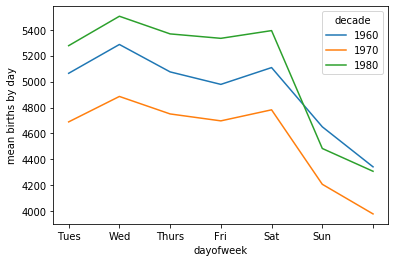

In [289]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']) 
plt.ylabel('mean births by day');

In [246]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [291]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [292]:
len(births_by_date)

366

In [277]:
births_by_date.index

MultiIndex([( 1,  1),
            ( 1,  2),
            ( 1,  3),
            ( 1,  4),
            ( 1,  5),
            ( 1,  6),
            ( 1,  7),
            ( 1,  8),
            ( 1,  9),
            ( 1, 10),
            ...
            (12, 22),
            (12, 23),
            (12, 24),
            (12, 25),
            (12, 26),
            (12, 27),
            (12, 28),
            (12, 29),
            (12, 30),
            (12, 31)],
           length=366)

## adding year to the index month and days

In [279]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

/Users/knight/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [278]:
for (month, day) in births_by_date.index[:10]:
    print(2012, month, day)
    

2012 1 1
2012 1 2
2012 1 3
2012 1 4
2012 1 5
2012 1 6
2012 1 7
2012 1 8
2012 1 9
2012 1 10


In [281]:
births_by_date.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=366, freq=None)

In [282]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


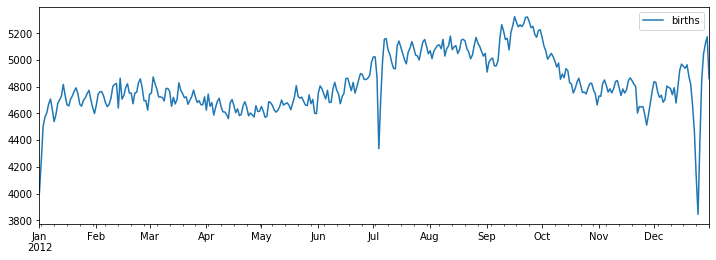

In [285]:
# Plot the results
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4)) 
births_by_date.plot(ax=ax);

In [294]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])

full_monte = pd.DataFrame({'name': monte,'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C','B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [295]:
full_monte['name'].str.get_dummies('|')

,Eric Idle,Graham Chapman,John Cleese,Michael Palin,Terry Gilliam,Terry Jones
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
5,0,0,0,1,0,0


In [2]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016',data_source='yahoo')

goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [3]:
goog = goog['Close']

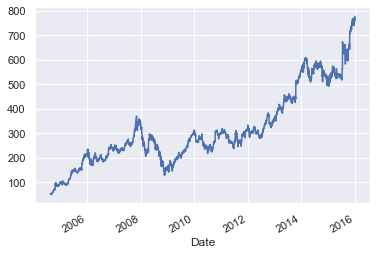

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

goog.plot();

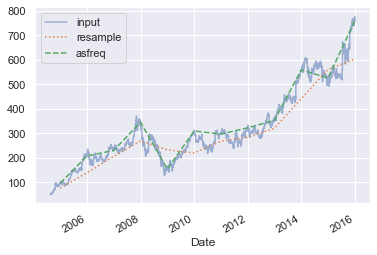

In [5]:
goog.plot(alpha=0.5, style='-') 
goog.resample('BA').mean().plot(style=':') 
goog.asfreq('BA').plot(style='--'); 
plt.legend(['input', 'resample', 'asfreq'],loc='upper left');

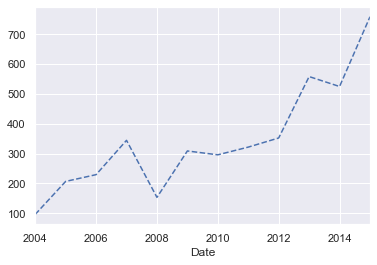

In [13]:
goog.asfreq('BA').plot(style='--');

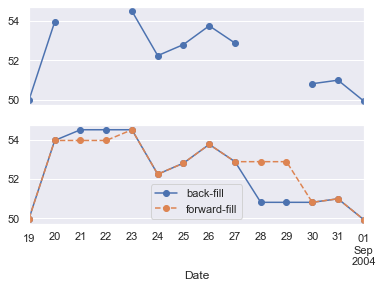

In [19]:
fig, ax = plt.subplots(2, sharex=True) 
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o') 
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o') 
ax[1].legend(["back-fill", "forward-fill"]);

In [20]:
data.asfreq('D')

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21          NaN
2004-08-22          NaN
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-28          NaN
2004-08-29          NaN
2004-08-30    50.814533
2004-08-31    50.993862
2004-09-01    49.937820
Freq: D, Name: Close, dtype: float64

In [22]:
data.asfreq('D', method='ffill')

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21    53.952770
2004-08-22    53.952770
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-28    52.876804
2004-08-29    52.876804
2004-08-30    50.814533
2004-08-31    50.993862
2004-09-01    49.937820
Freq: D, Name: Close, dtype: float64

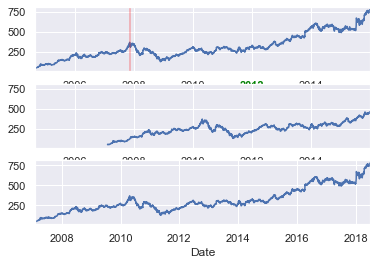

In [37]:
import pandas as pd

fig, ax = plt.subplots(3, sharey=True)
            # apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0]) 
goog.shift(900).plot(ax=ax[1]) 
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05') 
offset = pd.Timedelta(900, 'D')

ax[0].axvline(local_max, alpha=0.3, color='red')
ax[0].get_xticklabels()[4].set(weight='heavy', color='green')

In [26]:
local_max

Timestamp('2007-11-05 00:00:00')

In [27]:
offset

Timedelta('900 days 00:00:00')

In [28]:
goog

Date
2004-08-19     49.982655
2004-08-20     53.952770
2004-08-21     53.952770
2004-08-22     53.952770
2004-08-23     54.495735
                 ...    
2015-12-27    748.400024
2015-12-28    762.510010
2015-12-29    776.599976
2015-12-30    771.000000
2015-12-31    758.880005
Freq: D, Name: Close, Length: 4152, dtype: float64

In [41]:
goog.tshift(-365)

Date
2003-08-20     49.982655
2003-08-21     53.952770
2003-08-22     53.952770
2003-08-23     53.952770
2003-08-24     54.495735
                 ...    
2014-12-27    748.400024
2014-12-28    762.510010
2014-12-29    776.599976
2014-12-30    771.000000
2014-12-31    758.880005
Freq: D, Name: Close, Length: 4152, dtype: float64

In [46]:
goog 

Date
2004-08-19     49.982655
2004-08-20     53.952770
2004-08-21     53.952770
2004-08-22     53.952770
2004-08-23     54.495735
                 ...    
2015-12-27    748.400024
2015-12-28    762.510010
2015-12-29    776.599976
2015-12-30    771.000000
2015-12-31    758.880005
Freq: D, Name: Close, Length: 4152, dtype: float64

In [51]:
roi = 100* (goog.tshift(-366)/goog)

In [50]:
roi

Date
2003-08-19   NaN
2003-08-20   NaN
2003-08-21   NaN
2003-08-22   NaN
2003-08-23   NaN
              ..
2015-12-27   NaN
2015-12-28   NaN
2015-12-29   NaN
2015-12-30   NaN
2015-12-31   NaN
Freq: D, Name: Close, Length: 4518, dtype: float64

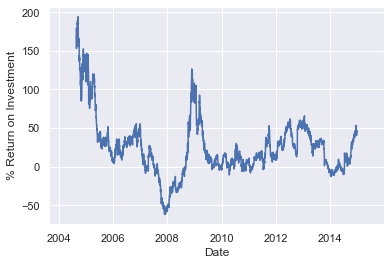

In [53]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

In [54]:
ROI

Date
2003-08-20   NaN
2003-08-21   NaN
2003-08-22   NaN
2003-08-23   NaN
2003-08-24   NaN
              ..
2015-12-27   NaN
2015-12-28   NaN
2015-12-29   NaN
2015-12-30   NaN
2015-12-31   NaN
Freq: D, Name: Close, Length: 4517, dtype: float64

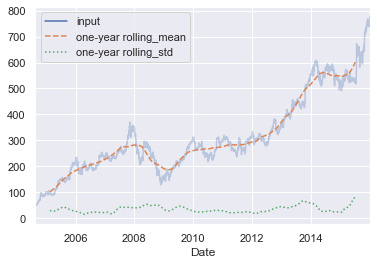

In [84]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()}) 

ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [95]:
data

,input,one-year rolling_mean,one-year rolling_std
Date,,,
2004-08-19,49.982655,NaN,NaN
2004-08-20,53.952770,NaN,NaN
2004-08-21,53.952770,NaN,NaN
2004-08-22,53.952770,NaN,NaN
2004-08-23,54.495735,NaN,NaN
...,...,...,...
2015-12-27,748.400024,NaN,NaN
2015-12-28,762.510010,NaN,NaN
2015-12-29,776.599976,NaN,NaN


In [101]:
data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv', index_col='Date', parse_dates=True) 
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [102]:
data.drop(['Fremont Bridge Total'], axis = 1, inplace = True) 
  
data.columns = ['West', 'East']
data

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0
...,...,...
2020-03-31 19:00:00,9.0,9.0
2020-03-31 20:00:00,6.0,16.0
2020-03-31 21:00:00,2.0,5.0


In [104]:
data['Total'] = data.eval('West + East')
data

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0
...,...,...,...
2020-03-31 19:00:00,9.0,9.0,18.0
2020-03-31 20:00:00,6.0,16.0,22.0
2020-03-31 21:00:00,2.0,5.0,7.0


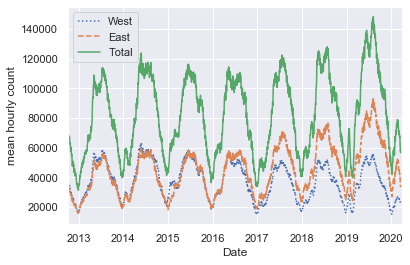

In [105]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-']) 
plt.ylabel('mean hourly count');


In [106]:
daily.rolling(30, center=True).sum()

,West,East,Total
Date,,,
2012-10-03,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN
2012-10-06,NaN,NaN,NaN
2012-10-07,NaN,NaN,NaN
...,...,...,...
2020-03-27,NaN,NaN,NaN
2020-03-28,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN


In [113]:
a = pd.Series([1,2,3,4,5,6,7,8])
b = a.rolling(2,center = True).sum()

In [114]:
b

0     NaN
1     3.0
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    15.0
dtype: float64

In [112]:
8+7

15

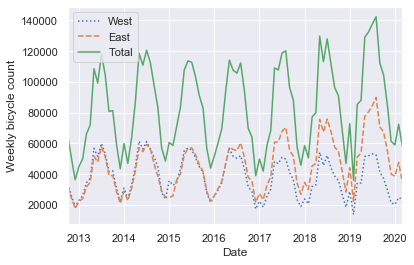

In [120]:
weekly = data.resample('M').sum() 
weekly.plot(style=[':', '--', '-']) 
plt.ylabel('Weekly bicycle count');

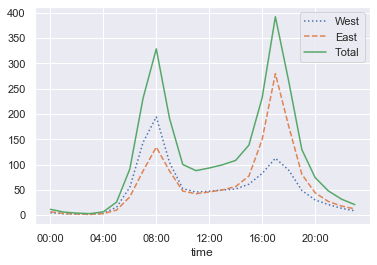

In [124]:
by_time = data.groupby(data.index.time).mean() 
hourly_ticks = 4 * 60 * 60 * np.arange(6) 
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

In [139]:
4 * 60 * 60  

14400

In [125]:
hourly_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])

In [133]:
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

In [134]:
data.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2020-03-31 14:00:00', '2020-03-31 15:00:00',
               '2020-03-31 16:00:00', '2020-03-31 17:00:00',
               '2020-03-31 18:00:00', '2020-03-31 19:00:00',
               '2020-03-31 20:00:00', '2020-03-31 21:00:00',
               '2020-03-31 22:00:00', '2020-03-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=65688, freq=None)

In [136]:
data

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0
...,...,...,...
2020-03-31 19:00:00,9.0,9.0,18.0
2020-03-31 20:00:00,6.0,16.0,22.0
2020-03-31 21:00:00,2.0,5.0,7.0


In [140]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday

,West,East,Total
Date,,,
0,59.120951,73.917732,133.038683
1,63.293861,78.529631,141.823492
2,62.918798,77.987958,140.906756
3,60.129369,73.659314,133.788683
4,54.066510,66.390535,120.457045
5,31.761402,31.372016,63.133419
6,30.936874,29.670505,60.607379


In [141]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend') 
by_time = data.groupby([weekend, data.index.time]).mean()

In [157]:
np.unique(weekend)

array(['Weekday', 'Weekend'], dtype='<U7')

In [143]:
by_time

West        East       Total
Weekday 00:00:00    4.128900    5.492583    9.621483
        01:00:00    2.145269    2.625064    4.770332
        02:00:00    1.558568    1.603069    3.161637
        03:00:00    1.420460    1.303325    2.723785
        04:00:00    4.236829    3.406138    7.642967
        05:00:00   20.605627   12.599488   33.205115
        06:00:00   73.827110   47.058824  120.885934
        07:00:00  194.613811  115.963171  310.576982
        08:00:00  259.355499  177.031714  436.387212
        09:00:00  128.752303  106.725179  235.477482
        10:00:00   52.392528   48.259980  100.652508
        11:00:00   39.194985   36.356192   75.551177
        12:00:00   39.184749   38.639202   77.823951
        13:00:00   41.262404   42.739642   84.002046
        14:00:00   43.662916   51.669565   95.332481
        15:00:00   57.403069   81.037340  138.440409
        16:00:00   89.442455  184.186701  273.629156
        17:00:00  136.197954  370.481330  506.679284
        18:00:00  108.369821  230.848082  339.217903
        19:00:00   57.548849  101.761637  159.310486
        20:00:00   34.540665   53.468542   88.009207
        21:00:00   23.836829   31.630691   55.467519
        22:00:00   15.041944   20.302813   35.344757
        23:00:00    9.030691   13.107928   22.138619
Weekend 00:00:00    6.758312    9.451407   16.209719
        01:00:00    4.191816    5.216113    9.407928
        02:00:00    2.817010    3.274485    6.091495
        03:00:00    1.754476    1.748082    3.502558
        04:00:00    1.603581    2.292839    3.896419
        05:00:00    3.934783    3.368286    7.303069
        06:00:00    7.965473    8.941176   16.906650
        07:00:00   16.736573   15.496164   32.232737
        08:00:00   31.296675   28.476982   59.773657
        09:00:00   42.524297   38.721228   81.245524
        10:00:00   52.673913   46.102302   98.776215
        11:00:00   62.079284   56.994885  119.074169
        12:00:00   67.933504   63.708440  131.641944
        13:00:00   70.581841   67.622762  138.204604
        14:00:00   71.869565   68.735294  140.604859
        15:00:00   70.598465   68.138107  138.736573
        16:00:00   64.898977   63.112532  128.011509
        17:00:00   53.305627   53.007673  106.313299
        18:00:00   41.379795   40.562660   81.942455
        19:00:00   27.292839   28.000000   55.292839
        20:00:00   19.226343   21.418159   40.644501
        21:00:00   13.556266   15.508951   29.065217
        22:00:00    9.943734   12.140665   22.084399
        23:00:00    7.240409   10.268542   17.508951

In [ ]:
sales
          city state  units
0    Mendocino    CA      1
1       Denver    CO      4
2       Austin    TX      2
3  Springfield    MO      5
4  Springfield    IL      1

In [158]:
revenue = pd.DataFrame({'city':['Austin','Denver','Springfield','Mendocino'],
                       'branch_id':[10,20,30,47],
                       "state":['TX','CO','IL','CA'],
                       'revenue':[100,83,4,200]})
revenue

,city,branch_id,state,revenue
0,Austin,10,TX,100
1,Denver,20,CO,83
2,Springfield,30,IL,4
3,Mendocino,47,CA,200


In [160]:
sales = pd.DataFrame({'city':['Mendocino','Denver','Austin','Springfield','Springfield'],
                       "state":['CA','CO','TX','MO','IL'],
                       'units':[1,4,2,5,1]})
sales

,city,state,units
0,Mendocino,CA,1
1,Denver,CO,4
2,Austin,TX,2
3,Springfield,MO,5
4,Springfield,IL,1


In [163]:
revenue_and_sales = pd.merge(revenue, sales, how='right' , on=['city', 'state'])
revenue_and_sales

,city,branch_id,state,revenue,units
0,Austin,10.0,TX,100.0,2
1,Denver,20.0,CO,83.0,4
2,Springfield,30.0,IL,4.0,1
3,Mendocino,47.0,CA,200.0,1
4,Springfield,NaN,MO,NaN,5


In [164]:
revenue_and_sales = pd.merge(revenue, sales, how='right')
revenue_and_sales

,city,branch_id,state,revenue,units
0,Austin,10.0,TX,100.0,2
1,Denver,20.0,CO,83.0,4
2,Springfield,30.0,IL,4.0,1
3,Mendocino,47.0,CA,200.0,1
4,Springfield,NaN,MO,NaN,5
